In [30]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [31]:
file = 'static/data/income_evaluation.csv'
data = pd.read_csv(file)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
data_with_labels = data

In [33]:
working_class = data['workclass'].unique()
working_class
EmploymentLabels = {}
for workclass in working_class:
    result = np.where((working_class==workclass))
    EmploymentLabels[workclass] = result[0][0]
data_with_labels['workclassLabels'] = data_with_labels['workclass']
data_with_labels['workclassLabels'] = data['workclassLabels'].map(EmploymentLabels) 

In [34]:
marital_statuses = data['marital-status'].unique()
MaritalLabels = {}
for status in marital_statuses:
    result = np.where((marital_statuses==status))
    MaritalLabels[status] = result[0][0]
data_with_labels['maritalLabels'] = data_with_labels['marital-status']
data_with_labels['maritalLabels'] = data['maritalLabels'].map(MaritalLabels) 

In [35]:
occupations = data['occupation'].unique()
OccupationLabels = {}
for occupation in occupations:
    result = np.where((occupations==occupation))
    OccupationLabels[occupation] = result[0][0]
data_with_labels['occupationLabels'] = data_with_labels['occupation']
data_with_labels['occupationLabels'] = data['occupationLabels'].map(OccupationLabels) 

In [36]:
relationships = data['relationship'].unique()
RelationshipLabels = {}
for relationship in relationships:
    result = np.where((relationships==relationship))
    RelationshipLabels[relationship] = result[0][0]
data_with_labels['relationshipLabels'] = data_with_labels['relationship']
data_with_labels['relationshipLabels'] = data['relationshipLabels'].map(RelationshipLabels) 

In [37]:
races = data['race'].unique()
RaceLabels = {}
for race in races:
    result = np.where((races==race))
    RaceLabels[race] = result[0][0]
data_with_labels['raceLabels'] = data_with_labels['race']
data_with_labels['raceLabels'] = data['raceLabels'].map(RaceLabels) 

In [38]:
sexes = data['sex'].unique()
SexLabels = {}
for sex in sexes:
    result = np.where((sexes==sex))
    SexLabels[sex] = result[0][0]
data_with_labels['sexLabels'] = data_with_labels['sex']
data_with_labels['sexLabels'] = data['sexLabels'].map(SexLabels) 

In [39]:
countries = data['native-country'].unique()
CountryLabels = {}
for country in countries:
    result = np.where((countries==country))
    CountryLabels[country] = result[0][0]
data_with_labels['countryLabels'] = data_with_labels['native-country']
data_with_labels['countryLabels'] = data['countryLabels'].map(CountryLabels) 

In [40]:
incomes = data['income'].unique()
IncomeLabels = {}
for income in incomes:
    result = np.where((incomes==income))
    IncomeLabels[income] = result[0][0]
data_with_labels['incomeLabels'] = data_with_labels['income']
data_with_labels['incomeLabels'] = data['incomeLabels'].map(IncomeLabels) 

In [41]:
labeled_data = data_with_labels[['age','education-num','workclassLabels','maritalLabels','occupationLabels','relationshipLabels','raceLabels','sexLabels','countryLabels','incomeLabels']]
labeled_data

,age,education-num,workclassLabels,maritalLabels,occupationLabels,relationshipLabels,raceLabels,sexLabels,countryLabels,incomeLabels
0,39,13,0,0,0,0,0,0,0,0
1,50,13,1,1,1,1,0,0,0,0
2,38,9,2,2,2,0,0,0,0,0
3,53,7,2,1,2,1,1,0,0,0
4,28,13,2,1,3,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,12,2,1,10,2,0,1,0,0
32557,40,9,2,1,9,1,0,0,0,1
32558,58,9,2,6,0,4,0,1,0,0
32559,22,9,2,0,0,3,0,0,0,0


## Multiple Regression

In [47]:
# Assign the data to X and y

X = labeled_data[["age","education-num", "workclassLabels"]]
y = labeled_data["incomeLabels"].values.reshape(-1, 1)
print(X.shape, y.shape)

(32561, 3) (32561, 1)


In [48]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [49]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [50]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1629543773140697
Testing Score: 0.159778211621613


Text(0.5, 1.0, 'Residual Plot')

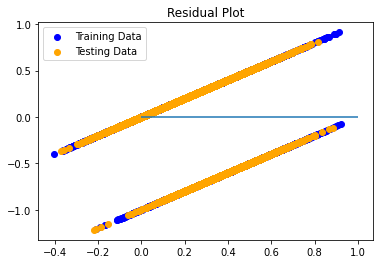

In [46]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION